In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
import warnings; warnings.simplefilter('ignore')

In [129]:
# multi-class classification with Keras using sk-learn
from keras.wrappers.scikit_learn import KerasClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import tensorflow as tf

In [130]:
data= pd.read_csv('Final_Day_Wise.csv') 

In [131]:
data.head(5)

,Received_D,Disease_Label,Disease,RHC_BHU_Na,RHC_BHU_Ad,Location_Count,District,Lattitude,Longitude,Date_Time,...,AOD,AP,CO,NO2,O3,PM2.5,RH,SO2,Temp,WS
0,23-11-17,1,ARI/Pneum > 5 Yrs,Basic Health Unit SHUMAR (GUNJIAL) KHUSHAB,SHUMAR (GUNJIAL) KHUSHAB,1,KHUSHAB,32.334890,71.848239,03-04-18,...,0.3503,189.1250,91.211405,2.335950e+15,65.832864,0.000020,22.875,0.68,18.6460,2.75567
1,23-11-17,1,ARI/Pneum > 5 Yrs,62 D CHAK 62 D TEHSIL PAKPATTAN PAKPATTAN,62 D CHAK 62 D TEHSIL PAKPATTAN PAKPATTAN,14,PAKPATTAN,30.540938,73.475297,14-03-18,...,0.4661,106.3750,94.820280,5.739270e+15,65.891072,0.000020,19.000,0.22,18.4878,3.21655
2,23-11-17,1,ARI/Pneum > 5 Yrs,Basic Health Unit KUMHARIWALA PAKPATTAN,KUMHARIWALA PAKPATTAN,3,PAKPATTAN,30.378399,73.496829,17-03-18,...,0.4661,93.3125,92.841219,4.477190e+15,64.959750,0.000019,17.500,-0.08,18.4878,3.15340
3,23-11-17,1,ARI/Pneum > 5 Yrs,Basic Health Unit KALYANA PAKPATTAN,KALYANA PAKPATTAN,8,PAKPATTAN,30.261263,73.226405,20-03-18,...,0.4661,93.3125,92.841219,4.483400e+15,64.959750,0.000020,17.500,-0.50,18.7967,2.83184
4,23-11-17,1,ARI/Pneum > 5 Yrs,Basic Health Unit JAFFAR ALI SHAH PAKPATTAN,JAFFAR ALI SHAH PAKPATTAN,2,PAKPATTAN,30.495269,73.314006,20-04-18,...,0.4661,93.3125,92.841219,4.477190e+15,64.959750,0.000021,17.500,-0.08,18.9396,2.62127


In [132]:
data.shape

(553, 21)

In [133]:
data.columns

Index(['Received_D', 'Disease_Label', 'Disease', 'RHC_BHU_Na', 'RHC_BHU_Ad',
       'Location_Count', 'District', 'Lattitude', 'Longitude', 'Date_Time',
       'Date_Count', 'AOD', 'AP', 'CO', 'NO2', 'O3', 'PM2.5', 'RH', 'SO2',
       'Temp', 'WS'],
      dtype='object')

In [134]:
data.isnull().values.any()

True

<AxesSubplot:>

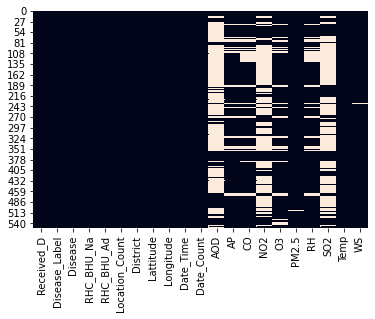

In [135]:
sns.heatmap(data.isnull(), cbar=False)

In [136]:
data.describe()

,Disease_Label,Location_Count,Lattitude,Longitude,Date_Count,AOD,AP,CO,NO2,O3,PM2.5,RH,SO2,Temp,WS
count,553.000000,553.000000,553.000000,553.000000,553.000000,159.000000,481.000000,456.000000,2.090000e+02,465.000000,552.000000,458.000000,188.00000,553.00000,548.000000
mean,0.643761,22.204340,31.257549,72.951641,908.338156,0.683618,139.683300,108.665388,3.811680e+15,58.979287,0.000044,21.391000,-0.10633,15.43407,3.622571
std,0.479321,17.158781,1.046057,1.181431,695.578632,0.430058,54.364615,7.689928,1.793017e+15,6.880281,0.000056,15.206496,0.59042,4.77658,1.099053
min,0.000000,1.000000,28.332020,70.116183,1.000000,0.000000,89.312500,87.660737,9.248780e+14,41.676685,0.000008,2.859380,-1.67000,7.76589,1.169440
25%,0.000000,5.000000,30.772300,72.332593,320.000000,0.425500,98.812500,103.478669,2.622550e+15,54.715201,0.000020,7.929688,-0.34000,12.85390,2.831840
50%,1.000000,21.000000,31.289634,73.041873,788.000000,0.503900,111.875000,108.848326,3.425900e+15,57.159923,0.000026,17.500000,-0.08500,14.20050,3.546430
75%,1.000000,37.000000,32.094217,73.712479,1593.000000,0.773800,194.875000,113.388524,4.448810e+15,63.795596,0.000039,29.625000,0.26000,16.22740,4.345575
max,1.000000,92.000000,33.957646,75.310606,2263.000000,2.809800,291.750000,130.734406,1.069450e+16,94.296411,0.000347,94.000000,1.45000,39.82000,8.938190


In [137]:
data.dtypes

Received_D         object
Disease_Label       int64
Disease            object
RHC_BHU_Na         object
RHC_BHU_Ad         object
Location_Count      int64
District           object
Lattitude         float64
Longitude         float64
Date_Time          object
Date_Count          int64
AOD               float64
AP                float64
CO                float64
NO2               float64
O3                float64
PM2.5             float64
RH                float64
SO2               float64
Temp              float64
WS                float64
dtype: object

In [150]:
data1 = data.drop(['Received_D' ,'Disease', 'RHC_BHU_Na', 'District', 'Lattitude', 'Longitude',\
                 'Date_Time', 'Date_Count','Location_Count'], axis = 1)

In [151]:
data1.head()

,Disease_Label,RHC_BHU_Ad,AOD,AP,CO,NO2,O3,PM2.5,RH,SO2,Temp,WS
0,1,SHUMAR (GUNJIAL) KHUSHAB,0.3503,189.1250,91.211405,2.335950e+15,65.832864,0.000020,22.875,0.68,18.6460,2.75567
1,1,62 D CHAK 62 D TEHSIL PAKPATTAN PAKPATTAN,0.4661,106.3750,94.820280,5.739270e+15,65.891072,0.000020,19.000,0.22,18.4878,3.21655
2,1,KUMHARIWALA PAKPATTAN,0.4661,93.3125,92.841219,4.477190e+15,64.959750,0.000019,17.500,-0.08,18.4878,3.15340
3,1,KALYANA PAKPATTAN,0.4661,93.3125,92.841219,4.483400e+15,64.959750,0.000020,17.500,-0.50,18.7967,2.83184
4,1,JAFFAR ALI SHAH PAKPATTAN,0.4661,93.3125,92.841219,4.477190e+15,64.959750,0.000021,17.500,-0.08,18.9396,2.62127


In [152]:
data1.shape

(553, 12)

In [153]:
data1.isnull().sum()

Disease_Label      0
RHC_BHU_Ad         0
AOD              394
AP                72
CO                97
NO2              344
O3                88
PM2.5              1
RH                95
SO2              365
Temp               0
WS                 5
dtype: int64

In [154]:
data2 = data1.fillna(data1.mean())

In [155]:
data2.isnull().sum()

Disease_Label    0
RHC_BHU_Ad       0
AOD              0
AP               0
CO               0
NO2              0
O3               0
PM2.5            0
RH               0
SO2              0
Temp             0
WS               0
dtype: int64

In [156]:
for column in data2:
    unique_vals = np.unique(data2[column])
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values  for feature {} : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature {} : {}'.format(column, nr_values))

The number of values  for feature Disease_Label : 2 -- [0 1]
The number of values  for feature RHC_BHU_Ad : 525
The number of values  for feature AOD : 43
The number of values  for feature AP : 137
The number of values  for feature CO : 127
The number of values  for feature NO2 : 138
The number of values  for feature O3 : 135
The number of values  for feature PM2.5 : 234
The number of values  for feature RH : 124
The number of values  for feature SO2 : 66
The number of values  for feature Temp : 229
The number of values  for feature WS : 228


In [157]:
# Making categorical variables into numeric representation
sel_features = ['RHC_BHU_Ad']

print(data2.shape)

raw_data = data1[sel_features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = sel_features)

print(new_raw_data.shape)

new_raw_data

(553, 12)
(553, 1)
(553, 525)


,RHC_BHU_Ad_1 WB VEHARI,RHC_BHU_Ad_221 Dooghra CHINIOT,RHC_BHU_Ad_267 EB VEHARI,RHC_BHU_Ad_41 WB VEHARI,RHC_BHU_Ad_453 GB FAISALABAD,RHC_BHU_Ad_477 EB VEHARI,RHC_BHU_Ad_490 GB 490 GB FAISALABAD,RHC_BHU_Ad_518-TDA MUZAFFARGARH,RHC_BHU_Ad_521 EB VEHARI,RHC_BHU_Ad_53 WB VEHARI,...,RHC_BHU_Ad_VANDALA NASIR KHAN SHEIKHUPURA,RHC_BHU_Ad_VARIO SIALKOT,RHC_BHU_Ad_VEERM CHAK 4 KASUR,RHC_BHU_Ad_VIJH SARGODHA,RHC_BHU_Ad_WAHEER KHUSHAB,RHC_BHU_Ad_WANDILA JAGHEER OKARA,RHC_BHU_Ad_WARA SEHRAN LAYYAH,RHC_BHU_Ad_WARSALKE SIALKOT,RHC_BHU_Ad_Wali Pur Bora NAROWAL,RHC_BHU_Ad_Wandhar MUZAFFARGARH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
data3 = pd.concat([data2, new_raw_data], axis=1)
data3.shape

(553, 537)

In [192]:
#data3.to_csv('DayDataCorrelation(Day).csv', index = False)

In [163]:
X = data3.drop(['Disease_Label','RHC_BHU_Ad'], axis = 1)
X = X.values
X.shape

(553, 535)

In [164]:
y = data3['Disease_Label']
y = y.values
y.shape

(553,)

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

In [166]:
print(X_sc.shape)
print(y.shape)

(553, 535)
(553,)


In [167]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
from collections import Counter

In [168]:
X_S, y_S = smote.fit_resample(X_sc,y)

In [169]:
print(X.shape)
print(y.shape)

(553, 535)
(553,)


In [170]:
print(X_S.shape)
print(y_S.shape)

(712, 535)
(712,)


In [171]:
print("Before Smote :", Counter(y))
print("After Smote :", Counter(y_S))

Before Smote : Counter({1: 356, 0: 197})
After Smote : Counter({1: 356, 0: 356})


In [172]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.20, random_state = 5)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size = 0.20, random_state = 5)

In [174]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(442, 535)
(442,)
(111, 535)
(111,)


In [175]:
print(X_train_S.shape)
print(y_train_S.shape)
print(X_test_S.shape)
print(y_test_S.shape)

(569, 535)
(569,)
(143, 535)
(143,)


### SVM

In [176]:
#without SMOTE
model = SVC(random_state = 0) 

parameters = [{'C': [0.01,0.1,1,10,100], 'kernel': ['rbf', 'linear'], 'gamma':[0.01,0.5,1,5,10]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.6742424242424242
{'C': 1, 'gamma': 5, 'kernel': 'rbf'}

Accuracy Score  on test data: 0.5225225225225225
[[ 0 52]
 [ 1 58]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.53      0.98      0.69        59

    accuracy                           0.52       111
   macro avg       0.26      0.49      0.34       111
weighted avg       0.28      0.52      0.36       111



In [177]:
#With SMOTE
model = SVC(random_state = 0) 

parameters = [{'C': [0.01,0.1,1,10,100], 'kernel': ['rbf', 'linear'], 'gamma':[0.01,0.5,1,5,10]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.8400062656641604
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

Accuracy Score  on test data: 0.8951048951048951
[[57 10]
 [ 5 71]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        67
           1       0.88      0.93      0.90        76

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.89       143



In [ ]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

In [184]:
model = SVC(random_state = 0) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
    
model = SVC(random_state = 0) 
model.fit(X_train_S, y_train_S)
y_pred_S = model.predict(X_test_S)
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

>Accuracy Score  without SMOTE: 0.532
>Accuracy Score  with SMOTE: 0.832


### DT 

In [178]:
#Without SMOTE
model = DecisionTreeClassifier(random_state=0)

parameters = [{'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'splitter': ['best','random'],
              'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.6199999999999999
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}

Accuracy Score  on test data: 0.5495495495495496
[[13 39]
 [11 48]]
              precision    recall  f1-score   support

           0       0.54      0.25      0.34        52
           1       0.55      0.81      0.66        59

    accuracy                           0.55       111
   macro avg       0.55      0.53      0.50       111
weighted avg       0.55      0.55      0.51       111



In [179]:
#With SMOTE
model = DecisionTreeClassifier(random_state=0)

parameters = [{'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'splitter': ['best','random'],
              'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.6765037593984962
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

Accuracy Score  on test data: 0.6853146853146853
[[38 29]
 [16 60]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63        67
           1       0.67      0.79      0.73        76

    accuracy                           0.69       143
   macro avg       0.69      0.68      0.68       143
weighted avg       0.69      0.69      0.68       143



In [ ]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

In [185]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
    
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_S, y_train_S)
y_pred_S = model.predict(X_test_S)
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

>Accuracy Score  without SMOTE: 0.523
>Accuracy Score  with SMOTE: 0.636


### RF 

In [181]:
#Without SMOTE
model = RandomForestClassifier(random_state=0)

parameters = [{'n_estimators': [50, 100, 200, 500], 'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 2, 4], 'bootstrap': [True, False]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.6719696969696969
{'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy Score  on test data: 0.5315315315315315
[[ 0 52]
 [ 0 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.53      1.00      0.69        59

    accuracy                           0.53       111
   macro avg       0.27      0.50      0.35       111
weighted avg       0.28      0.53      0.37       111



In [180]:
#With SMOTE
model = RandomForestClassifier(random_state=0)

parameters = [{'n_estimators': [50, 100, 200, 500], 'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 2, 4], 'bootstrap': [True, False]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.725845864661654
{'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

Accuracy Score  on test data: 0.6853146853146853
[[42 25]
 [20 56]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        67
           1       0.69      0.74      0.71        76

    accuracy                           0.69       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.68      0.69      0.68       143



In [182]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

Test Accuracy with Grid Search CV:
>Accuracy Score  without SMOTE: 0.532
>Accuracy Score  with SMOTE: 0.685


In [183]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
    
model = RandomForestClassifier(random_state=0)
model.fit(X_train_S, y_train_S)
y_pred_S = model.predict(X_test_S)
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

>Accuracy Score  without SMOTE: 0.505
>Accuracy Score  with SMOTE: 0.664


### NB 

GaussianNB only accepts priors (arrray-like, shape(n_classes)) as an argument so unless you have some priors to set for your model ahead of time you will have nothing to grid search over.

In [186]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
    
model = GaussianNB()
model.fit(X_train_S, y_train_S)
y_pred_S = model.predict(X_test_S)
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

>Accuracy Score  without SMOTE: 0.468
>Accuracy Score  with SMOTE: 0.503


### Neural Network

##### Without SMOTE 

In [187]:
#Perceptron Tuning
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(5,5,5),(10,10,10),(15,15,15),(20,20,20),(25,25,25),(30,30,30),(35,35,35),(40,40,40),(45,45,45),(50,50,50),(55,55,55),(60,60,60),(65,65,65),(70,70,70),(75,75,75),(80,80,80),(85,85,85),(90,90,90),(95,95,95),(100,100,100)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.665151515151515
{'hidden_layer_sizes': (10, 10, 10)}


In [188]:
xaxis_perceptrons = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

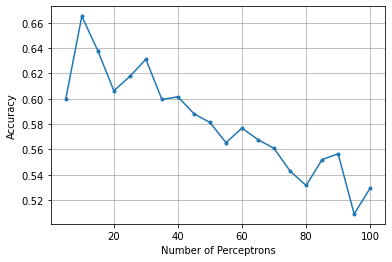

In [189]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron.png")
plt.show()

In [190]:
#Layer Tuning
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10),(10,10),(10,10,10),(10,10,10,10),(10,10,10,10,10),(10,10,10,10,10,10),(10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10,10,10,10)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.6674242424242424
{'hidden_layer_sizes': (10, 10)}


In [193]:
xaxis_layers = [1,2,3,4,5,6,7,8,9,10,11,12]

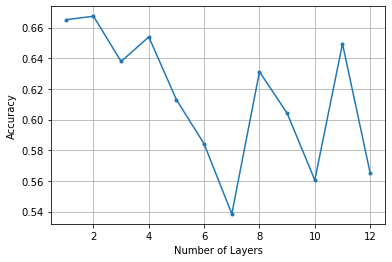

In [194]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Layers')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers.png")
plt.show()

In [195]:
#Tuning with Grid Seaerch CV
model = MLPClassifier(random_state=0)

parameters = {
    'hidden_layer_sizes': [(8,8), (10,10), (12,12)],
    'activation': ['relu','tanh'], 
    'solver': ['adam','sgd'], 
    'alpha': [0.001,0.01,0.1],
    'max_iter': [100,200]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.6719696969696969
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (8, 8), 'max_iter': 100, 'solver': 'sgd'}

Accuracy Score  on test data: 0.5315315315315315
[[ 0 52]
 [ 0 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.53      1.00      0.69        59

    accuracy                           0.53       111
   macro avg       0.27      0.50      0.35       111
weighted avg       0.28      0.53      0.37       111



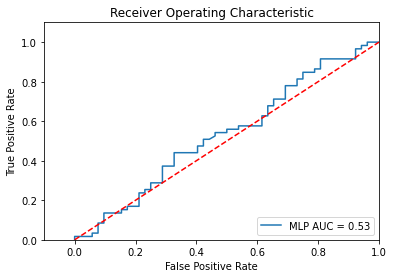

In [197]:
from sklearn.metrics import roc_curve, auc

mlp = MLPClassifier(solver='sgd', alpha=0.001, hidden_layer_sizes=[8,8], random_state=0, learning_rate='constant',activation='relu')

mlp.fit(X_train, y_train)
fpr2, tpr2, threshold = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# image drawing
plt.figure()
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, label = 'P AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, label = 'MLP AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("AUC.pdf")
plt.show()

##### With SMOTE 

In [198]:
#With SMOTE
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(5,5,5),(10,10,10),(15,15,15),(20,20,20),(25,25,25),(30,30,30),(35,35,35),(40,40,40),(45,45,45),(50,50,50),(55,55,55),(60,60,60),(65,65,65),(70,70,70),(75,75,75),(80,80,80),(85,85,85),(90,90,90),(95,95,95),(100,100,100)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8277882205513784
{'hidden_layer_sizes': (10, 10, 10)}


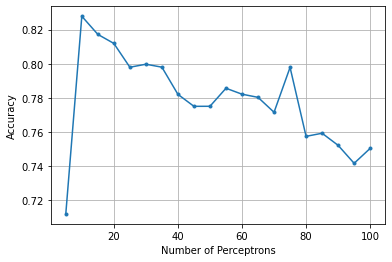

In [199]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_S.png")
plt.show()

In [200]:
#Layer Tuning
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10),(10,10),(10,10,10),(10,10,10,10),(10,10,10,10,10),(10,10,10,10,10,10),(10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10,10,10),(10,10,10,10,10,10,10,10,10,10,10,10)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8417919799498748
{'hidden_layer_sizes': 10}


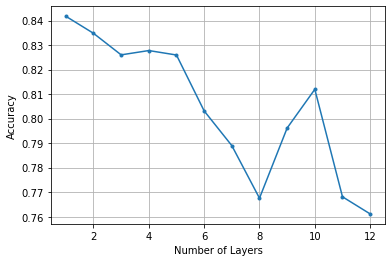

In [201]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Layers')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_S.png")
plt.show()

In [202]:
#Tuning with Grid Seaerch CV
model = MLPClassifier(random_state=0)

parameters = {
    'hidden_layer_sizes': [(8), (10), (12)],
    'activation': ['relu','tanh'], 
    'solver': ['adam','sgd'], 
    'alpha': [0.001,0.01,0.1],
    'max_iter': [100,200]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.8417606516290727
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 8, 'max_iter': 200, 'solver': 'adam'}

Accuracy Score  on test data: 0.8741258741258742
[[57 10]
 [ 8 68]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        67
           1       0.87      0.89      0.88        76

    accuracy                           0.87       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.87      0.87      0.87       143



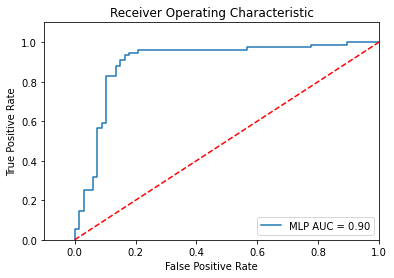

In [204]:
from sklearn.metrics import roc_curve, auc

mlp = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=[10], random_state=0, learning_rate='constant',activation='relu')

mlp.fit(X_train_S, y_train_S)
fpr2, tpr2, threshold = roc_curve(y_test_S, mlp.predict_proba(X_test_S)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# image drawing
plt.figure()
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, label = 'P AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, label = 'MLP AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("AUC_S.pdf")
plt.show()

### Keras Classifier

##### Without SMOTE

In [206]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(Dense(units=unit, input_dim = X_train.shape[1], activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    'epochs': [70,100],
    'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.5656565656565656
{'batch_size': 5, 'epochs': 70, 'unit': 80}


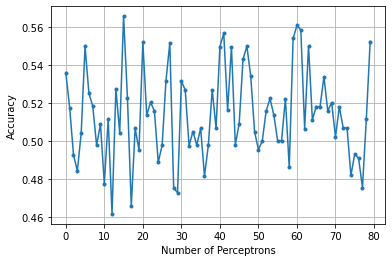

In [207]:
#Results with 80 accuracies (20*2*2)
plt.plot(means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.show()

In [209]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(Dense(units=unit, input_dim = X_train.shape[1], activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 70, batch_size = 5)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.5674747474747475
{'unit': 5}


In [210]:
xaxis_perceptrons = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

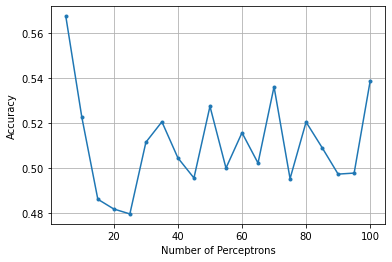

In [211]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_K.png")
plt.show()

In [212]:
#Layers Tuning

def create_model(No_Of_layers):
    model = Sequential()
    # Add an input layer
    model.add(Dense(units=5, input_dim = X_train.shape[1], activation='relu'))

    for i in range(No_Of_layers-1):
        model.add(Dense(units=5, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 70, batch_size = 5)

parameters = {
    #'unit': [5],
    'No_Of_layers': [1,2,3,4,5,6,7,8,9,10,11,12]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.6492929292929294
{'No_Of_layers': 10}


In [213]:
xaxis_layers = [1,2,3,4,5,6,7,8,9,10,11,12]

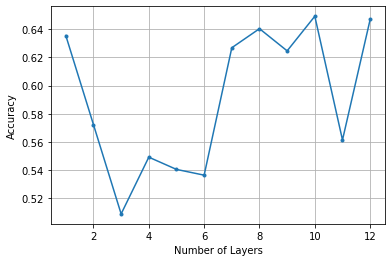

In [214]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Layers')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_K.png")
plt.show()

In [215]:
#Epochs Tuning

def create_model():
    model = Sequential()
    # Add an input layer
    model.add(Dense(units=5, input_dim = X_train.shape[1], activation='relu'))

    for i in range(10-1):
        model.add(Dense(units=5, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 5)

parameters = {
    #'unit': [5],
    'epochs': [30,40,50,60,70,80,90,100,110,120]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.6492929292929293
{'epochs': 50}


In [216]:
xaxis_epochs = [30,40,50,60,70,80,90,100,110,120]

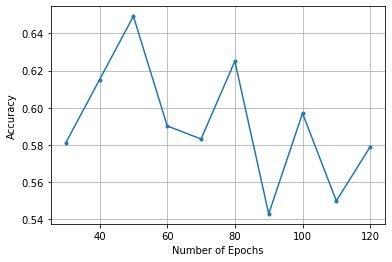

In [217]:
plt.plot(xaxis_epochs,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfEpochs_K.png")
plt.show()

In [218]:
#Batch Size Tuning

def create_model():
    model = Sequential()
    # Add an input layer
    model.add(Dense(units=5, input_dim = X_train.shape[1], activation='relu'))

    for i in range(10-1):
        model.add(Dense(units=5, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 50)

parameters = {
    #'unit': [5],
    'batch_size': [0,2,5,7,10,12,15,17,20]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.6312626262626263
{'batch_size': 20}


In [219]:
xaxis_batch = [0,2,5,7,10,12,15,17,20]

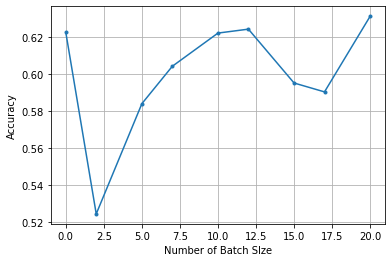

In [220]:
plt.plot(xaxis_batch,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Batch SIze')
plt.grid()

#plt.savefig("GridSearchCV Screenshots/Exp3/No.OfBatch_K.png")
plt.show()

In [221]:
#Tuning with Grid Seaerch CV

def create_model(unit, activation, solver, last_act):
    model = Sequential()
    model.add(Dense(units=unit, input_dim = X_train.shape[1], activation=activation))
    
    for i in range(10-1):
        model.add(Dense(units=unit, activation=activation))
    
    model.add(Dense(1, activation=last_act))
    model.compile(loss='binary_crossentropy', optimizer=solver, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [5,10],
    'activation': ['relu','tanh'], 
    'solver': ['adam','sgd'], 
    'last_act': ['sigmoid','softmax'],
    'epochs': [50,80],
    'batch_size': [12,20] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.6742929292929293
{'activation': 'tanh', 'batch_size': 20, 'epochs': 50, 'last_act': 'sigmoid', 'solver': 'sgd', 'unit': 5}

Accuracy Score  on test data: 0.5315315315315315
[[ 0 52]
 [ 0 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.53      1.00      0.69        59

    accuracy                           0.53       111
   macro avg       0.27      0.50      0.35       111
weighted avg       0.28      0.53      0.37       111



##### Without SMOTE 

In [ ]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(Dense(units=unit, input_dim = X_train_S.shape[1], activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    'epochs': [70,100],
    'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
#Results with 80 accuracies (20*2*2)
plt.plot(means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.show()

In [ ]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(Dense(units=unit, input_dim = X_train_S.shape[1], activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 10)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_K_S.png")
plt.show()

In [ ]:
#Layers Tuning

def create_model(No_Of_layers):
    model = Sequential()
    # Add an input layer
    model.add(Dense(units=95, input_dim = X_train_S.shape[1], activation='relu'))

    for i in range(No_Of_layers-1):
        model.add(Dense(units=95, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 10)

parameters = {
    #'unit': [95],
    'No_Of_layers': [1,2,3,4,5,6,7,8,9,10,11,12]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_K_S.png")
plt.show()

In [ ]:
#Epochs Tuning

def create_model():
    model = Sequential()
    # Add an input layer
    model.add(Dense(units=95, input_dim = X_train_S.shape[1], activation='relu'))

    for i in range(3-1):
        model.add(Dense(units=95, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 10)

parameters = {
    #'unit': [95],
    'epochs': [30,40,50,60,70,80,90,100,110,120]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
plt.plot(xaxis_epochs,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfEpochs_K_S.png")
plt.show()

In [ ]:
#Batch Size Tuning

def create_model():
    model = Sequential()
    # Add an input layer
    model.add(Dense(units=95, input_dim = X_train_S.shape[1], activation='relu'))

    for i in range(3-1):
        model.add(Dense(units=95, activation='relu'))

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 110)

parameters = {
    #'unit': [95],
    'batch_size': [0,2,5,7,10,12,15,17,20]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
plt.plot(xaxis_batch,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Batch SIze')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfBatch_K_S.png")
plt.show()

In [ ]:
#Tuning with Grid Seaerch CV

def create_model(unit,activation,solver,last_act):
    model = Sequential()
    model.add(Dense(units=unit, input_dim = X_train_S.shape[1], activation=activation))
    
    for i in range(3-1):
        model.add(Dense(units=unit, activation=activation))
    
    model.add(Dense(1, activation=last_act))
    model.compile(loss='binary_crossentropy', optimizer=solver, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [85,95],
    'activation': ['relu','tanh'], 
    'solver': ['adam','sgd'], 
    'last_act': ['sigmoid','softmax'],
    'epochs': [60,110],
    'batch_size': [5,20]    
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

In [ ]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))